In [1]:
# Graph
using Graphs: SimpleGraph, connected_components
using SimpleWeightedGraphs: SimpleWeightedGraph

# Plot
using Cairo
using Colors: distinguishable_colors, @colorant_str
using Compose
using Fontconfig
using GraphPlot: gplot, spring_layout
using Plots: Plot, plot, plot!, savefig, twinx, PlotMeasures

# Misc
using DataFrames: DataFrame
using StatsBase: mean
using Random: MersenneTwister

# Original modules
include("../src/Output.jl")
include("../src/SimPlot.jl")
using .Output.Simulation
using .Output
using .SimPlot

In [2]:
function make_variability(amplitude::Float64, quarter_wavelength::Int, limit::Int)::Vector{Float64}
    result = Vector{Float64}()
    values = [1.0, 1.0 + amplitude, 1.0, 1 / (1.0 + amplitude)]

    while length(result) < limit
        for v in values
            append!(result, repeat([v], quarter_wavelength))
        end
    end

    return result[1:limit]
end

function plot_output_df(df::DataFrame, skip::Int = 10)::Plot
    p1 = plot(
        title = "Cooperation",
        xl = "Generation",
        xlim = (0, 1000),
        xticks = 0:50:1000,
        size = (1200, 300),
        left_margin = 6 * PlotMeasures.mm,
        right_margin = 6 * PlotMeasures.mm,
        bottom_margin = 6 * PlotMeasures.mm
    )
    plot!(df.generation, df.cooperation_rate, label = false, lc = :blue, ylim = (0, 1), yl = "Frequency of Cooperator")
    plot!(twinx(), df.generation, df.N, xlim = (0, 1000), label = false, lc = :red, yl = "Population")
    display(p1)

    params1 = join(["$(k) = $(v)" for (k, v) in pairs(df[1, [2, 3, 10, 11]])], ", ")
    params2 = join(["$(k) = $(v)" for (k, v) in pairs(df[1, 4:9])], ", ")

    return plot(
        SimPlot.plot_network_attributes(df, "weak", skip),
        SimPlot.plot_component_attributes(df, "weak", 1, skip),
        SimPlot.plot_component_attributes(df, "weak", 2, skip),
        SimPlot.plot_network_attributes(df, "medium", skip),
        SimPlot.plot_component_attributes(df, "medium", 1, skip),
        SimPlot.plot_component_attributes(df, "medium", 2, skip),
        SimPlot.plot_network_attributes(df, "strong", skip),
        SimPlot.plot_component_attributes(df, "strong", 1, skip),
        SimPlot.plot_component_attributes(df, "strong", 2, skip),
        layout = (3, 3),
        size = (1200, 1200),
        bottom_margin = 6 * PlotMeasures.mm,
        suptitle = "$(params1)\n$(params2)",
        plot_titlefontsize = 10,
    )
end;

mean(output_df.N) = 271.293


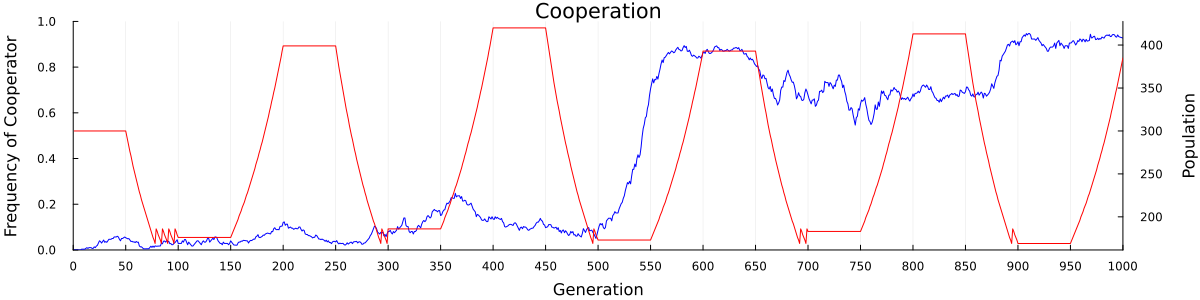

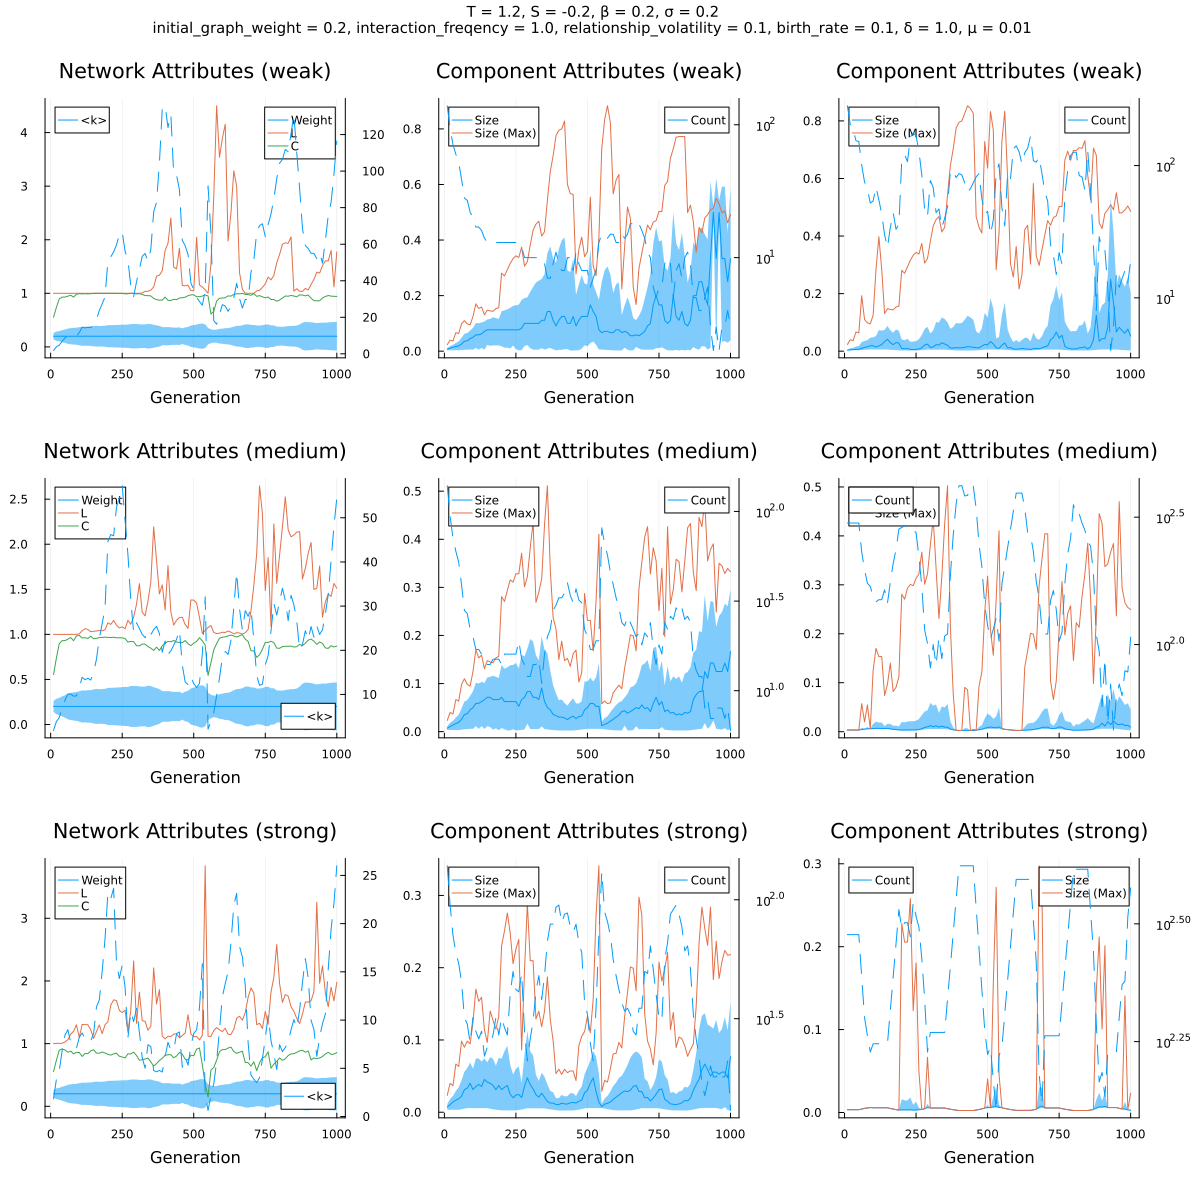

In [17]:
param = Param(
    initial_N = 300,
    initial_graph_weight = 0.2,
    T = 1.2,
    S = -0.2,
    δ = 1.0,
    β = 0.2,
    σ = 0.2,
    μ = 0.01,
    generations = 1000,
    # rng = MersenneTwister(1), # 人口増加局面に協力率急上昇 (1, 6)
    rng = MersenneTwister(8), # 人口減少局面に協力率急上昇 (3, 5, 8, 9)
    # rng = MersenneTwister(7), # 長い時間を掛けて協力率上昇 (7)
    # rng = MersenneTwister(10), # 協力率が上がらない (2, 4, 10)
)
model = Model(param)
# model.env_severity_vec = make_variability(0.0, 5, 100)
model.env_severity_vec = make_variability(0.2, 5, 100)

output_df = Output.make_output_df(model.param)
strategy_vec_vec = []
graph_weights_vec = []

for generation = 1:model.param.generations
    interaction!(model)
    death_and_birth!(model, generation)
    Output.log!(output_df, generation, model, true)
    push!(strategy_vec_vec, copy(model.strategy_vec))
    push!(graph_weights_vec, model.graph_weights)
end

p = plot_output_df(output_df)
# savefig(p, "2.png")
display(p)

第580世代
協力率: 0.872791519434629
弱い繋がりグループ: 14個, [234, 2, 1, 4, 13, 1, 2, 4, 15, 1, 1, 3, 1, 1]
中程度の繋がりグループ: 46個, [17, 2, 13, 1, 2, 1, 5, 8, 4, 1, 3, 1, 2, 13, 1, 11, 13, 13, 10, 12, 15, 5, 2, 2, 4, 16, 7, 15, 4, 15, 7, 11, 2, 9, 1, 7, 2, 15, 1, 1, 3, 2, 1, 1, 1, 1]
強い繋がりグループ: 70個, [17, 2, 13, 1, 2, 1, 5, 8, 4, 1, 3, 1, 2, 1, 1, 11, 4, 1, 6, 10, 1, 4, 1, 2, 2, 1, 15, 1, 15, 10, 3, 8, 4, 7, 11, 5, 1, 2, 4, 1, 9, 1, 7, 2, 2, 3, 2, 5, 15, 1, 1, 2, 11, 1, 3, 3, 1, 2, 1, 2, 3, 3, 1, 1, 1, 1, 2, 2, 1, 2]
弱い繋がりグループ: 79個, [86, 1, 18, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 11, 1, 9, 15, 1, 1, 1, 7, 15, 1, 15, 1, 8, 7, 11, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
中程度の繋がりグループ: 283個, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

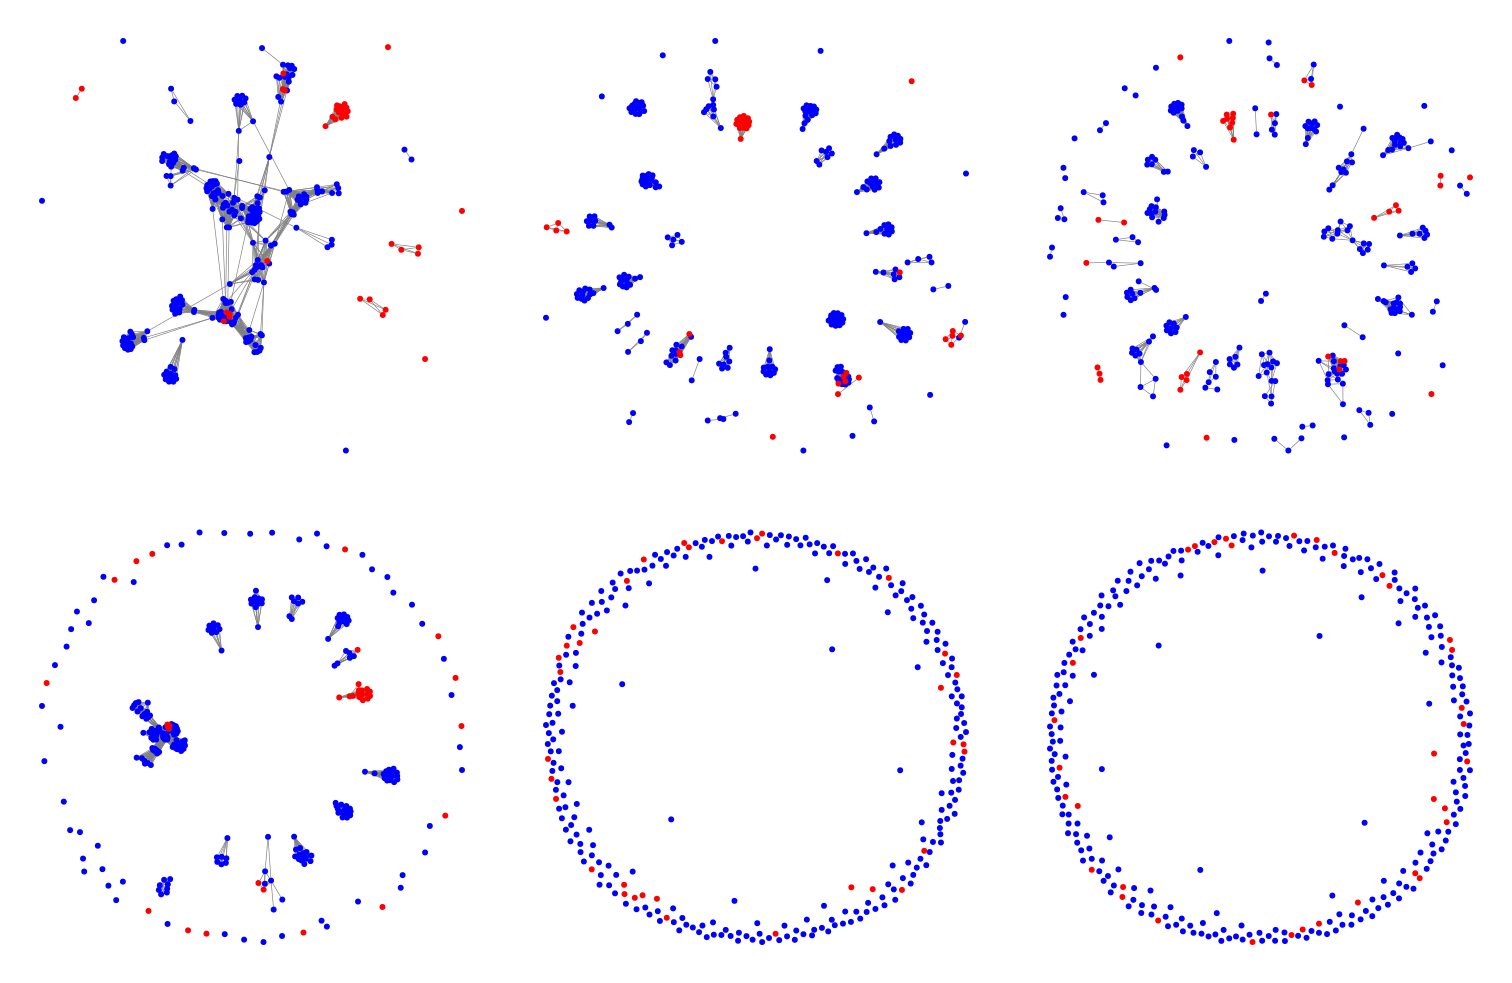

false

In [33]:
set_default_graphic_size(24cm, 8cm)

i = 580

color_val_vec = [s == C ? colorant"blue" : colorant"red" for s in strategy_vec_vec[i]]
g25 = SimpleGraph(graph_weights_vec[i] .>= Output.WEAK_THRESHOLD)
g50 = SimpleGraph(graph_weights_vec[i] .>= Output.MEDIUM_THRESHOLD)
g75 = SimpleGraph(graph_weights_vec[i] .>= Output.STRONG_THRESHOLD)

println("第$(i)世代")
println("協力率: $(mean(strategy_vec_vec[i] .== C))")
g25_components = [length(c) for c in connected_components(g25)]
g50_components = [length(c) for c in connected_components(g50)]
g75_components = [length(c) for c in connected_components(g75)]
println("弱い繋がりグループ: $(length(g25_components))個, $(g25_components)")
println("中程度の繋がりグループ: $(length(g50_components))個, $(g50_components)")
println("強い繋がりグループ: $(length(g75_components))個, $(g75_components)")

p1 = hstack(
    gplot(g25, nodefillc=color_val_vec, edgestrokec = colorant"gray", spring_layout(g25, C = 4.0)...),
    gplot(g50, nodefillc=color_val_vec, edgestrokec = colorant"gray", spring_layout(g50, C = 4.0)...),
    gplot(g75, nodefillc=color_val_vec, edgestrokec = colorant"gray", spring_layout(g75, C = 4.0)...)
)

N = size(graph_weights_vec[i], 1)
initial_graph_weight = 0.2
graph_weights = Output.convert_to_2nd_order_weights(graph_weights_vec[i], N, initial_graph_weight)
Simulation.normalize_graph_weights!(graph_weights, N, initial_graph_weight)
g25 = SimpleGraph(graph_weights .>= Output.WEAK_THRESHOLD)
g50 = SimpleGraph(graph_weights .>= Output.MEDIUM_THRESHOLD)
g75 = SimpleGraph(graph_weights .>= Output.STRONG_THRESHOLD)
g25_components = [length(c) for c in connected_components(g25)]
g50_components = [length(c) for c in connected_components(g50)]
g75_components = [length(c) for c in connected_components(g75)]
println("弱い繋がりグループ: $(length(g25_components))個, $(g25_components)")
println("中程度の繋がりグループ: $(length(g50_components))個, $(g50_components)")
println("強い繋がりグループ: $(length(g75_components))個, $(g75_components)")

p2 = hstack(
    gplot(g25, nodefillc=color_val_vec, edgestrokec = colorant"gray", spring_layout(g25, C = 4.0)...),
    gplot(g50, nodefillc=color_val_vec, edgestrokec = colorant"gray", spring_layout(g50, C = 4.0)...),
    gplot(g75, nodefillc=color_val_vec, edgestrokec = colorant"gray", spring_layout(g75, C = 4.0)...)
)

draw(PNG(400, 260), vstack(p1, p2))